In [1]:
# Dataset: banknotes.csv
# location: https://mitu.co.in/dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('banknotes.csv')
df.head(3)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


In [4]:
# Separate input and output data

x = df.drop('Class', axis = 1)   # input
y = df['Class']

## Cross Validation

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.25,
                                                   random_state= 0)

## Build the model

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dt = DecisionTreeClassifier()

In [9]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [10]:
# prediction on test data

In [11]:
y_pred = dt.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9795918367346939

In [13]:
new = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [14]:
new

,Actual,Predicted
1023,1,1
642,0,0
1196,1,1
31,0,0
253,0,0
...,...,...
866,1,1
361,0,0
703,0,0
328,0,0


## Evaluate

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

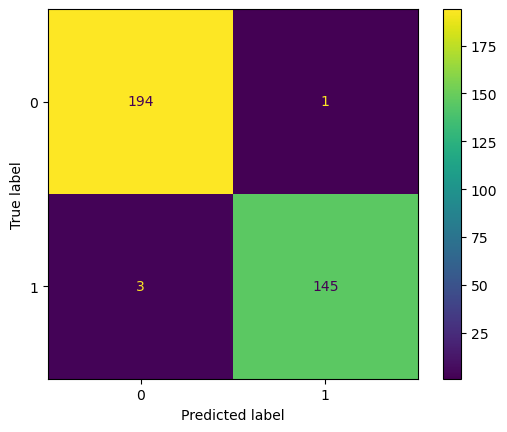

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [17]:
from sklearn.metrics import classification_report

In [21]:
y_test.value_counts()

Class
0    195
1    148
Name: count, dtype: int64

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       195
           1       0.99      0.98      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [22]:
from sklearn.tree import plot_tree

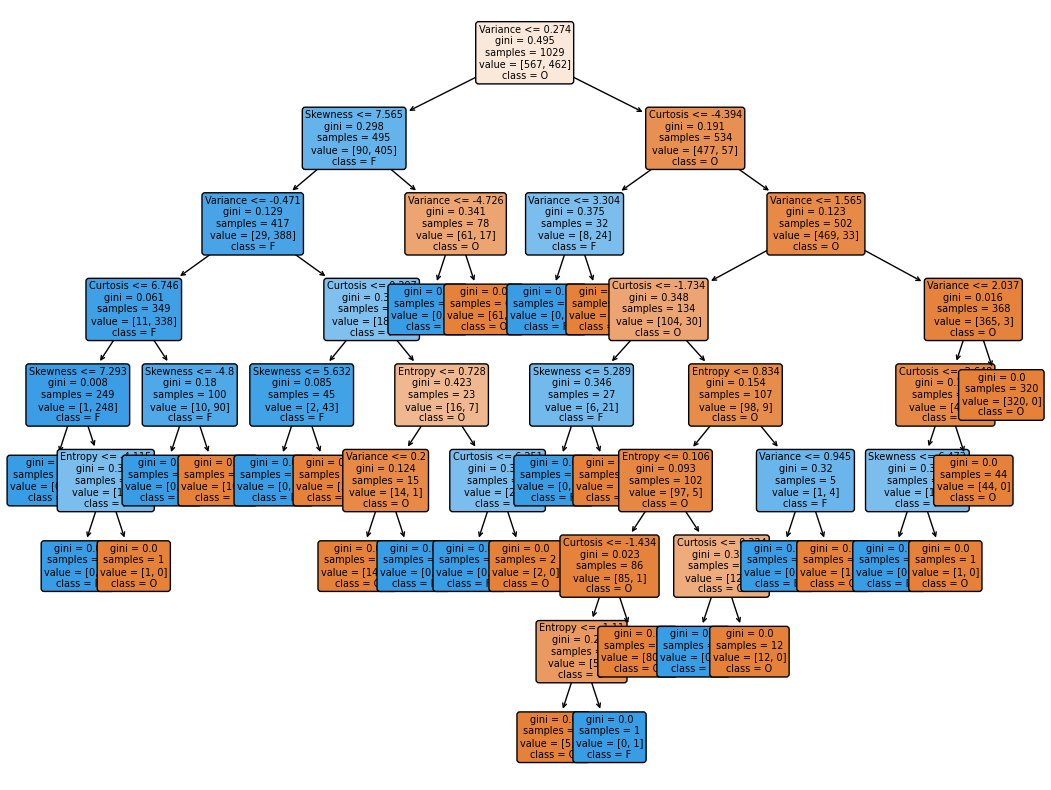

In [27]:
plt.figure(figsize=(13, 10))

plot_tree(dt, filled = True, feature_names= x.columns,
         rounded= True, fontsize= 7, class_names=['O','F']);

In [29]:
imp = dt.feature_importances_

In [30]:
imp

array([0.62409501, 0.19614157, 0.15040355, 0.02935987])

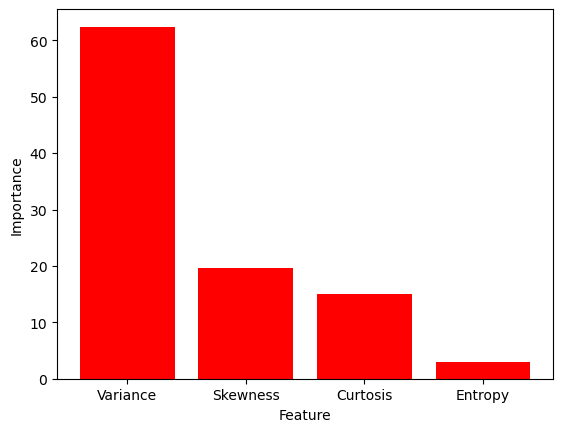

In [32]:
# plot bar graph for importance of feature


plt.xlabel('Feature')
plt.ylabel('Importance')
plt.bar(x.columns, imp * 100, color = 'r');